# PROJECT: WRANGLING AND ANALYZING DATA

## Table of content


1. Importing the neccessary libraries

2. Data Gathering

3. Assessing data

4. Cleaning data

5. Storing cleaned data

6. Analyzing and Visualization

7. References

8. Limitations

 Prior to data gathering, the neccessary libraries need to be imported. This is done in the cell below

In [1]:
# Import the neccessary libraries
import pandas as pd
import numpy as np
import wptools
import os
import requests
from PIL import Image
from io import BytesIO
import tweepy
from tweepy import OAuthHandler
import timeit
import time
from timeit import default_timer as timer
from time import sleep
import json
from datetime import timedelta
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("darkgrid")

## Data Gathering

Three pieces of data are gathered from different sources for this project and are loaded in this notebook.

**Note**: The methods required to gather each data are differnt.

1.**Below, shows a direct download of the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)**

To query all of the tweet IDs in the WeRateDogs Twitter archive, 20-30 minutes of running time can be expected. Printing out each tweet ID after it was queried and using a code timer would be helpful for sanity reasons.

In [2]:
#This returns the time for running each cells in seconds
from datetime import timedelta

start = timer()

end = timer()
print(timedelta(seconds=end-start))

0:00:00.000054


The file was downloaded manually by clicking the following link:` twitter_archive_enhanced.csv`. Once downloaded, it was uploaded and read into a pandas DataFrame.


In [3]:
df_twitter=pd.read_csv('/Users/toymat/Downloads/sub/twitter-archive-enhanced.csv')
df_twitter

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


2.**This image file `(image_predictions.tsv)` is present in each tweet according to a neural network. It is to be downloaded programmatically as seen below.**


Using the Requests library and the following URL:, https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv. After downloading, it is then read into a pandas dataframe.



In [4]:
url ='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response=requests.get(url)

In [5]:
with open ('image-predictions.tsv', mode='wb') as file:
    file.write(response.content)

In [6]:
#The image file is read into a dtaframe 'image_prediction' below
image_prediction=pd.read_csv('image-predictions.tsv',sep='\t')
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3.**Additional data from the Twitter API**

Below,each tweet id,retweet count and favorite ("like") count at the minimum is gathered using the tweet IDs in the WeRateDogs Twitter archive.We query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file.

Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count. 

In [7]:
# 
consumer_key = input('Enter consumer-key:')
consumer_secret = input('Enter consumer-secret:')
access_token = input('Enter access-token:')
access_secret = input('Enter access-secret:')

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

Enter consumer-key:Nnmw96DSYF9TtANGlfJS3l0a9
Enter consumer-secret:XWYddREo3dWr4crUtti38T8n3z6KIIKwHks9cFiPMoZWOOZirp
Enter access-token:1538104401738571776-DVDvjGLExXxJswrnUMz0mPdyEUfuB1
Enter access-secret:9tB9fsE6fa3dbznevyvBsRTWexIaFNW1EeZCYdWd23lXy


In [7]:
#Returns the length of entries in the dataframe
tweet_ids = df_twitter.tweet_id.values
len(tweet_ids)

2356

In [10]:
#gets the tweet data via tweet_id
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.errors.TweepyException as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

In [8]:
twitter_list=[]
with open('tweet_json.txt', 'r') as file:
    for line in file:
        tweet=json.loads(line)
        tweet_id=tweet['id']
        twitter_list.append({'tweet_id':tweet['id'],
                             'retweet_count':tweet['retweet_count'],
                             'favorite_count':tweet['favorite_count']
                            })

In [9]:
#converts the columns from the json file into a dataframe
twitter_data=pd.DataFrame(twitter_list)

In [10]:
twitter_data

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7003,33810
1,892177421306343426,5301,29323
2,891815181378084864,3478,22044
3,891689557279858688,7224,36928
4,891327558926688256,7757,35308
...,...,...,...
2312,666049248165822465,37,89
2313,666044226329800704,115,247
2314,666033412701032449,36,100
2315,666029285002620928,39,112


## Assessing Data

In this section,at least **eight (8) quality issues(content issues) and two (2) tidiness issues(structural issues)** are documented,using **both** visual assessment and programmatic assessement to assess the data.


_Start by picking each data piece one after the other to access. taking the `twitterarchive_clean` data first to access below;_

In [11]:
df_twitter.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [12]:
df_twitter.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [13]:
#returns the information on the data as a whole
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [14]:
# This cell returns unique values in the doggo column
df_twitter['floofer'].unique()

array(['None', 'floofer'], dtype=object)

In [15]:
#this returns the unique values in the text column
df_twitter['text'].unique()

array(["This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
       "This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",
       'This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB',
       ...,
       'Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR',
       'This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI',
       'Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj'],
      dtype=object)

In [16]:
#this returns the unique values in the rating denominator column
df_twitter['rating_denominator'].unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2])

In [17]:
df_twitter.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [18]:
#this returns the rows with null values in the retweeted_status_user_id
df_twitter[df_twitter['retweeted_status_user_id'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [19]:
#this returns the datatpes for all the columns in this dataframe
df_twitter.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

In [20]:
df_twitter.timestamp.value_counts()

2017-08-01 16:23:56 +0000    1
2016-01-13 02:43:46 +0000    1
2016-01-15 02:41:12 +0000    1
2016-01-15 02:08:05 +0000    1
2016-01-15 01:25:33 +0000    1
                            ..
2016-09-11 21:34:30 +0000    1
2016-09-10 23:54:11 +0000    1
2016-09-10 16:03:16 +0000    1
2016-09-09 18:31:54 +0000    1
2015-11-15 22:32:08 +0000    1
Name: timestamp, Length: 2356, dtype: int64

In [21]:
#to check the rows with duplicated information in the dataframe
df_twitter[df_twitter.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [22]:
df_twitter.tweet_id.sort_values()

2355    666020888022790149
2354    666029285002620928
2353    666033412701032449
2352    666044226329800704
2351    666049248165822465
               ...        
4       891327558926688256
3       891689557279858688
2       891815181378084864
1       892177421306343426
0       892420643555336193
Name: tweet_id, Length: 2356, dtype: int64

`Twitterarchive_clean` data having being accessed, and moving on to accessing the second data piece which happens to be the `image_clean` data

In [23]:
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [24]:
image_prediction.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [25]:
image_prediction['tweet_id'].duplicated().sum()

0

In [26]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [27]:
#this returns the number of times each entry in the tweet_id column appears
image_prediction.tweet_id.value_counts()

666020888022790149    1
761292947749015552    1
767122157629476866    1
766793450729734144    1
766693177336135680    1
                     ..
684097758874210310    1
683857920510050305    1
683852578183077888    1
683849932751646720    1
892420643555336193    1
Name: tweet_id, Length: 2075, dtype: int64

In [28]:
image_prediction.tweet_id.sort_values()

0       666020888022790149
1       666029285002620928
2       666033412701032449
3       666044226329800704
4       666049248165822465
               ...        
2070    891327558926688256
2071    891689557279858688
2072    891815181378084864
2073    892177421306343426
2074    892420643555336193
Name: tweet_id, Length: 2075, dtype: int64

In [29]:
image_prediction.duplicated().sum()

0

Moving on to accessing the last piece of data
(`twitterdata_clean`)for quality and tidines

In [30]:
twitter_data.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7003,33810
1,892177421306343426,5301,29323
2,891815181378084864,3478,22044
3,891689557279858688,7224,36928
4,891327558926688256,7757,35308


In [31]:
twitter_data.tail()

,tweet_id,retweet_count,favorite_count
2312,666049248165822465,37,89
2313,666044226329800704,115,247
2314,666033412701032449,36,100
2315,666029285002620928,39,112
2316,666020888022790149,422,2292


In [32]:
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2317 entries, 0 to 2316
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2317 non-null   int64
 1   retweet_count   2317 non-null   int64
 2   favorite_count  2317 non-null   int64
dtypes: int64(3)
memory usage: 54.4 KB


In [33]:
twitter_data.tweet_id.value_counts()

892420643555336193    1
684481074559381504    1
687312378585812992    1
687127927494963200    1
687124485711986689    1
                     ..
772826264096874500    1
772615324260794368    1
772581559778025472    1
772193107915964416    1
666020888022790149    1
Name: tweet_id, Length: 2317, dtype: int64

In [34]:
twitter_data.tweet_id.sort_values()

2316    666020888022790149
2315    666029285002620928
2314    666033412701032449
2313    666044226329800704
2312    666049248165822465
               ...        
4       891327558926688256
3       891689557279858688
2       891815181378084864
1       892177421306343426
0       892420643555336193
Name: tweet_id, Length: 2317, dtype: int64

In [35]:
twitter_data.dtypes

tweet_id          int64
retweet_count     int64
favorite_count    int64
dtype: object

In [36]:
twitter_data[twitter_data['retweet_count'].isnull()]

,tweet_id,retweet_count,favorite_count


In [37]:
twitter_data.duplicated().sum()

0

### Quality issues
#### twitterarchive_clean Table:
1. columns like`in_reply_to_status_id`,`in_reply_to_user_id`,`retweeted_status_id`,`retweeted_status_timestamp`, etc holds little data (i.e missing info)

2. Erroneous datatypes:The timestamp,text,source,etc column is given as an object.

3. incomplete names: some names are represented only in a letter, as none ,etc which makes the column inconsistent.

4. Null values represented as 'none'

5. timestamp column to be renamed

6. puppo,floffer,doggo and pupper columns contains missing data

7. Rating numerator column should be a float datatype and also correctly extracted

8. Rating denominator should have a float datatype

9. Source of tweet in an html format

10. text column contains url at the end of each entries


#### image_clean Table:
1. missing rows (2076 instead of 2354)

2. Errorneous datatypes for the some columns like p1,p2,p3 etc

3. img_num column is of no importance

#### twitterdata_clean Table:

1. missing data(2326 rows instead of 2356)

2. Retweet_counts and favourite count should have a datatype as float


### Tidiness issues
1. Age_stage in four different columns in the twitterarchive_clean table (floffer,puppa,doggo,puppo)

2. The three different tables should make up one observational unit

>_Having accessed the 8 quality issues and 2 tidiness issues, we now move on tho cleaning the accessed issues to achieve a clean and tidy data._

## Cleaning Data
In this section,**all** of the issues documented while assessing are cleaned. 

Before cleaning, a copy of the original to be made(This is as seen in the first three cells below). And in this session is where the three data will be merged.

In [350]:
df_twitter_clean=df_twitter.copy(deep=True)
image_clean=image_prediction.copy(deep=True)
twitterdata_clean=twitter_data.copy(deep=True)

### Issue #1:

#### Define: 
1. Drop columns with little or no information.

#### Code

In [351]:
df_twitter_clean.drop(columns=['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'], inplace=True)

#### Test

In [352]:
df_twitter_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Issue #2:
#### Define:
1. Unify all null values as NaN
2. Extract growth stages from doggo,floofer,pupper and puppo column into a new 'age_stage column'
3. Drop columns (doggo,floofer,pupper,and puppo) after grouping into growth_stage


#### Code

In [353]:
# handle none
df_twitter_clean.doggo.replace('None', '', inplace=True)
df_twitter_clean.floofer.replace('None', '', inplace=True)
df_twitter_clean.pupper.replace('None', '', inplace=True)
df_twitter_clean.puppo.replace('None', '', inplace=True)

# merge into column
df_twitter_clean['dog_stage'] = df_twitter_clean.doggo + df_twitter_clean.floofer + df_twitter_clean.pupper + df_twitter_clean.puppo

# handle multiple stages
df_twitter_clean.loc[df_twitter_clean.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo, pupper'
df_twitter_clean.loc[df_twitter_clean.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo, puppo'
df_twitter_clean.loc[df_twitter_clean.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo, floofer'

# handle missing values
df_twitter_clean.loc[df_twitter_clean.dog_stage == '', 'dog_stage'] = np.nan


In [354]:
df_twitter_clean.drop(columns=['doggo','floofer','puppo','pupper'] ,inplace=True)

#### Test

In [355]:
df_twitter_clean.dog_stage.value_counts()

pupper            245
doggo              83
puppo              29
doggo, pupper      12
floofer             9
doggo, puppo        1
doggo, floofer      1
Name: dog_stage, dtype: int64

### Issue #3:
#### Define:
1. convert timestamp column datatype to datetime as well as source,text etc to string


#### Code

In [356]:
# convert timestamp datatype to datetime
from datetime import datetime, timezone

df_twitter_clean['timestamp'] =  pd.to_datetime(df_twitter_clean['timestamp'], format='%Y/%m/%d')
df_twitter_clean['timestamp'] = df_twitter_clean['timestamp'].dt.tz_localize(None)
df_twitter_clean.rename(columns={'timestamp':'date_of_tweet'}, inplace=True)

In [357]:
columns=['source','text','dog_stage','expanded_urls']
for column in columns:
    df_twitter_clean[column]=df_twitter_clean[column].astype('string')

#### Test

In [358]:
df_twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2356 non-null   int64         
 1   date_of_tweet       2356 non-null   datetime64[ns]
 2   source              2356 non-null   string        
 3   text                2356 non-null   string        
 4   expanded_urls       2297 non-null   string        
 5   rating_numerator    2356 non-null   int64         
 6   rating_denominator  2356 non-null   int64         
 7   name                2356 non-null   object        
 8   dog_stage           380 non-null    string        
dtypes: datetime64[ns](1), int64(3), object(1), string(4)
memory usage: 165.8+ KB


### Issue #4:
#### Define: 
1. convert invalid names into NaN values and extract their original value from 'text' column

#### Code

In [359]:
df_twitter_clean.name=df_twitter_clean.name.replace(['^[a-z]+','None'], value=np.nan)

In [360]:
df_twitter_clean['name'] = df_twitter_clean['name'].apply(lambda x: x if str(x).lower() != x else np.nan)

In [361]:
# checking for the number of null values in the name column
sum(df_twitter_clean.name.isnull())

854

In [362]:
# This function extract names from text column and returns a nan value if nothing is found
def extract_names(text):
    name_list=text.split()
    for name in name_list:
        if name.lower()=='named':
            name_index=name_list.index(name)+1
            return name_list[name_index]
        else:
            pass
    return np.nan

In [363]:
df_twitter_clean.name=np.where(df_twitter_clean.name.isnull(),df_twitter_clean.text.apply(extract_names),df_twitter_clean.name)
df_twitter_clean['name']=df_twitter_clean['name'].astype('string')

#### Test

In [364]:
#checking for the number of nan values left after extracting names from text columns
sum(df_twitter_clean.name.isnull())

830

In [365]:
df_twitter_clean.name.unique()

<StringArray>
[   'Phineas',      'Tilly',     'Archie',      'Darla',   'Franklin',
         <NA>,        'Jax',       'Zoey',     'Cassie',       'Koda',
 ...
      'Clybe',       'Keet',      'Carll',      'Pepe.',    'Jockson',
 'Octaviath.',      'Josep',      'Lugan',      'Johm.', 'Christoper']
Length: 955, dtype: string

In [366]:
#This returns the number of entries for each names in the dataframe
df_twitter_clean.name.value_counts()

Charlie       12
Oliver        11
Cooper        11
Lucy          11
Penny         10
              ..
Spark          1
Gòrdón         1
Chuk.          1
Jo             1
Christoper     1
Name: name, Length: 954, dtype: Int64

### Issue #:
#### Define: 
1. Extract the correct rating values
2. Convert rating numerator to float datatype
3. Convert rating denominator to float datatype

#### Code

In [367]:
df_twitter_clean[df_twitter_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text','rating_numerator']]

/var/folders/tk/5c6pk9g51y91d566pwnkcd5m0000gn/T/ipykernel_2032/223626999.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  df_twitter_clean[df_twitter_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text','rating_numerator']]


,text,rating_numerator
45,This is Bella. She hopes her smile made you sm...,5
340,"RT @dog_rates: This is Logan, the Chow who liv...",75
695,"This is Logan, the Chow who lived. He solemnly...",75
763,This is Sophie. She's a Jubilant Bush Pupper. ...,27
1689,I've been told there's a slight possibility he...,5
1712,Here we have uncovered an entire battalion of ...,26


In [368]:
ratings=df_twitter_clean[df_twitter_clean.text.str.contains(r"(\d+\.\d*\/\d+)")]['text'].str.extract(r"(\d+\.\d*(?=\/\d+))")
ratings                        

/var/folders/tk/5c6pk9g51y91d566pwnkcd5m0000gn/T/ipykernel_2032/1394142720.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  ratings=df_twitter_clean[df_twitter_clean.text.str.contains(r"(\d+\.\d*\/\d+)")]['text'].str.extract(r"(\d+\.\d*(?=\/\d+))")


,0
45,13.5
340,9.75
695,9.75
763,11.27
1689,9.5
1712,11.26


In [369]:
df_twitter_clean.loc[ratings.index, 'rating_numerator']=ratings.values

In [370]:
df_twitter_clean.rating_numerator=df_twitter_clean.rating_numerator.astype('float')

In [371]:
df_twitter_clean.rating_denominator=df_twitter_clean.rating_denominator.astype('float')

#### Test

In [372]:
df_twitter_clean.loc[ratings.index]

,tweet_id,date_of_tweet,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
45,883482846933004288,2017-07-08 00:28:19,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,13.50,10.0,Bella,<NA>
340,832215909146226688,2017-02-16 13:11:49,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",https://twitter.com/dog_rates/status/786709082...,9.75,10.0,Logan,<NA>
695,786709082849828864,2016-10-13 23:23:56,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,9.75,10.0,Logan,<NA>
763,778027034220126208,2016-09-20 00:24:34,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,11.27,10.0,Sophie,pupper
1689,681340665377193984,2015-12-28 05:07:27,"<a href=""http://twitter.com/download/iphone"" r...",I've been told there's a slight possibility he...,<NA>,9.50,10.0,<NA>,<NA>
1712,680494726643068929,2015-12-25 21:06:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,https://twitter.com/dog_rates/status/680494726...,11.26,10.0,<NA>,<NA>


In [373]:
df_twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2356 non-null   int64         
 1   date_of_tweet       2356 non-null   datetime64[ns]
 2   source              2356 non-null   string        
 3   text                2356 non-null   string        
 4   expanded_urls       2297 non-null   string        
 5   rating_numerator    2356 non-null   float64       
 6   rating_denominator  2356 non-null   float64       
 7   name                1526 non-null   string        
 8   dog_stage           380 non-null    string        
dtypes: datetime64[ns](1), float64(2), int64(1), string(5)
memory usage: 165.8 KB


### Issue #7:
#### Define: 
1. Extract the source of tweet from the html format

#### Code

In [374]:
#This function extracts the strings between tags
for source in df_twitter_clean.columns:
    def extract_string(x):
        a=x.find('>') +1
        b=x[a:].find('<')
        return x[a:][:b]

In [375]:
df_twitter_clean.source=df_twitter_clean.source.apply(lambda x:extract_string(x)).astype('string')

#### Test

In [376]:
df_twitter_clean.source.unique()

<StringArray>
['Twitter for iPhone', 'Twitter Web Client', 'Vine - Make a Scene',
 'TweetDeck']
Length: 4, dtype: string

### Issue #7:
#### Define: 
1. convert p1,p2,p3,tweet_id datatypes to string 

#### Code

In [377]:
#This function converts the object datatypes into string
columns=['p1','p2','p3','jpg_url']
for column in columns:
    image_clean[column]=image_clean[column].astype('string')

#### Test

In [378]:
#confirming the corrected datatypes
image_clean.dtypes

tweet_id      int64
jpg_url      string
img_num       int64
p1           string
p1_conf     float64
p1_dog         bool
p2           string
p2_conf     float64
p2_dog         bool
p3           string
p3_conf     float64
p3_dog         bool
dtype: object

### Issue #8:
#### Define: 
1. Merge the 3 dataframes into one to make an observational unit

#### Code

In [379]:
df_twitter_merged1=pd.merge(df_twitter_clean,twitterdata_clean, on='tweet_id', how='left')
df_twitter_merged2=pd.merge(df_twitter_merged1,image_clean, on='tweet_id', how='left')

#### Test

In [380]:
df_twitter_merged2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2356 non-null   int64         
 1   date_of_tweet       2356 non-null   datetime64[ns]
 2   source              2356 non-null   string        
 3   text                2356 non-null   string        
 4   expanded_urls       2297 non-null   string        
 5   rating_numerator    2356 non-null   float64       
 6   rating_denominator  2356 non-null   float64       
 7   name                1526 non-null   string        
 8   dog_stage           380 non-null    string        
 9   retweet_count       2317 non-null   float64       
 10  favorite_count      2317 non-null   float64       
 11  jpg_url             2075 non-null   string        
 12  img_num             2075 non-null   float64       
 13  p1                  2075 non-null   string      

After merging, it is noticed that some columns datatypes became wrong. This should be corrected before proceeding..

In [381]:
#This function converts the object datatypes into string
columns=['p1_dog','p2_dog','p3_dog']
for column in columns:
    df_twitter_merged2[column]=df_twitter_merged2[column].astype('bool')

In [382]:
df_twitter_merged2['img_num']=df_twitter_merged2['img_num'].astype(int, errors='ignore')
df_twitter_merged2['tweet_id']=df_twitter_merged2['tweet_id'].astype('string')

In [383]:
df_twitter_merged2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2356 non-null   string        
 1   date_of_tweet       2356 non-null   datetime64[ns]
 2   source              2356 non-null   string        
 3   text                2356 non-null   string        
 4   expanded_urls       2297 non-null   string        
 5   rating_numerator    2356 non-null   float64       
 6   rating_denominator  2356 non-null   float64       
 7   name                1526 non-null   string        
 8   dog_stage           380 non-null    string        
 9   retweet_count       2317 non-null   float64       
 10  favorite_count      2317 non-null   float64       
 11  jpg_url             2075 non-null   string        
 12  img_num             2075 non-null   float64       
 13  p1                  2075 non-null   string      

### Issue #9:
#### Define: 
1. Drop the rows with missing values in the image column

#### Code

In [384]:
df_twitter_merged2=df_twitter_merged2[df_twitter_merged2.jpg_url.notnull()]

#### Test

In [385]:
df_twitter_merged2.shape

(2075, 22)

### Issue #10:
#### Define: 
1. Drop the rows with missing values in the retweet column

#### Code

In [386]:
df_twitter_merged2=df_twitter_merged2[df_twitter_merged2.retweet_count.notnull()]

#### Test

In [387]:
df_twitter_merged2.shape

(2048, 22)

In [388]:
df_twitter_merged2.retweet_count.isnull().sum()

0

## Storing  Cleaned Data

After the dataframes have been accessed and cleaned of quality issues and tidiness issues and they have been merged into one dataframe, we then have to store the merged data into`twitter_archive_master.csv`. This can be seen below:

In [389]:
df_twitter_merged2.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualization

#### Insights:


**A. The most popular growth_stage**


1. which growth_stage has the highest percentage?
2. which growth_stage has the lowest percentage?
3. Does any relationship exist between the name and the growth stage with repect to retweet_count?

#### Visualization

In [390]:
dog_count=df_twitter_merged2.dog_stage.value_counts()
dog_count

pupper            209
doggo              65
puppo              23
doggo, pupper      11
floofer             7
doggo, puppo        1
doggo, floofer      1
Name: dog_stage, dtype: Int64

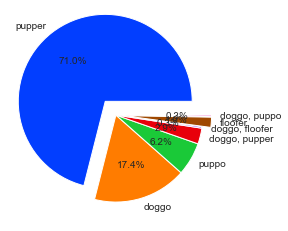

In [398]:
data=[265,65,23,11,1,7,1]
keys=['pupper','doggo','puppo','doggo, pupper','doggo, floofer','floofer','doggo, puppo']
explode = [0.2, 0, 0, 0,0,0.1,0.1]
palette_color = sns.color_palette('bright')
plt.pie(data, labels=keys, colors=palette_color,
        explode=explode, autopct='%1.1f%%')
# displaying chart
plt.show()

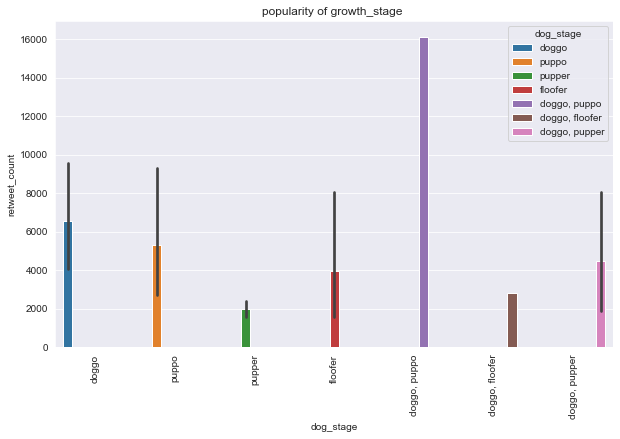

In [399]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=90)
bj=sns.barplot(x=df_twitter_merged2.dog_stage ,y=df_twitter_merged2.retweet_count,hue=df_twitter_merged2.dog_stage);
bj.set_title('popularity of growth_stage ')
plt.show()

1. pupper has the highest percentage of 71.0%
2. Two of the multiple dog stages (dogggo,puppo and doggo,floofer) has the lowest percentage of 0.3%
3. from the barplot showing how retweet_count affects dog_stage of dogs, it is seen that dogs in multiple stage(doggo,puppo)has the highest number of retweets

## References

1. How to merge multiple dataframes:[https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html]
2. Dropping rows of columns with missing entries:https://towardsdatascience.com/how-to-drop-rows-in-pandas-dataframes-with-nan-values-in-certain-columns-7613ad1a7f25
3. Replacing incomplete strings with NaN values:https://www.codegrepper.com/code-examples/python/frameworks/-file-path-python/replace+%22-%22+for+nan+in+dataframe

## Limitations

1. The dataframes in its early stage contained a lot of missing entries that even after cleaning, the presence of no null value couldnt be guaranteed.